## Solar Data Analysis and prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
# Read the dataset
data = pd.read_csv('./data/solar_data_copy_10%.csv')

data.head()

Timestamp   Air_Temp  Relative_Humidity  Wind_Speed  Wind_Direction  \
0  27-04-2022 15:32  43.349172          12.790256    0.533333      118.786620   
1  27-04-2022 15:34  43.433980          11.468986    1.866667       84.681408   
2  27-04-2022 15:36  43.286580          11.047298    2.866667       40.807156   
3  27-04-2022 15:38  43.523020          12.058292    0.000000       66.390848   
4  27-04-2022 15:40  43.728656          10.722330    2.266667        2.127408   

   Solar_Radiation       RTD_1      RTD_2      RTD_3      RTD_4      RTD_5  \
0        707.53384   98.289640  94.283552  89.002824  93.334288  94.142984   
1        710.46328   98.377480  94.177872  89.334664  93.633208  94.107592   
2        695.51016   97.868064  93.703480  88.844592  92.982568  93.650656   
3        696.24472  101.470960  97.112320  91.963472  96.146384  97.147776   
4        674.05752  101.664240  97.253520  91.980872  96.110968  97.341296   

   Array_Voltage  Array_Current  Power_Generated  
0      80.178232       5.364869        430.14572  
1      80.266728       5.366041        430.71452  
2      80.187416       5.365501        430.24568  
3      80.727760       5.364512        433.06504  
4      80.500312       5.365144        431.89576

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1009 non-null   object 
 1   Air_Temp           1009 non-null   float64
 2   Relative_Humidity  1009 non-null   float64
 3   Wind_Speed         1009 non-null   float64
 4   Wind_Direction     1009 non-null   float64
 5   Solar_Radiation    1009 non-null   float64
 6   RTD_1              1009 non-null   float64
 7   RTD_2              1009 non-null   float64
 8   RTD_3              1009 non-null   float64
 9   RTD_4              1009 non-null   float64
 10  RTD_5              1009 non-null   float64
 11  Array_Voltage      1009 non-null   float64
 12  Array_Current      1009 non-null   float64
 13  Power_Generated    1009 non-null   float64
dtypes: float64(13), object(1)
memory usage: 110.5+ KB


### Visualizing the data

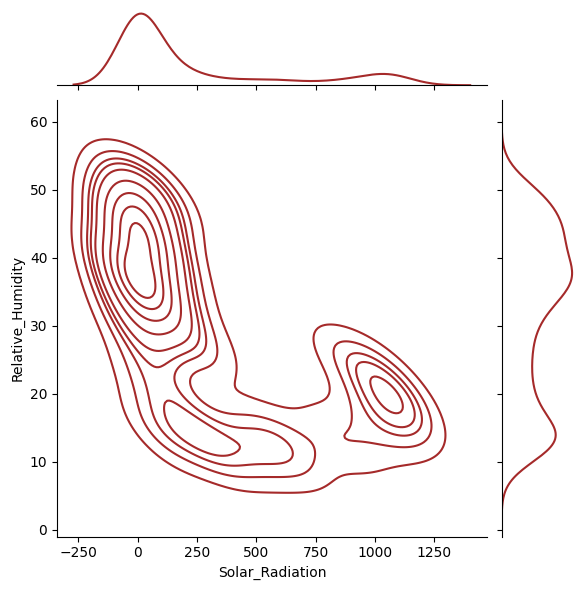

In [5]:
# 变量关系图
sns.jointplot(x='Solar_Radiation', y='Relative_Humidity', data=data, kind='kde', color='brown')

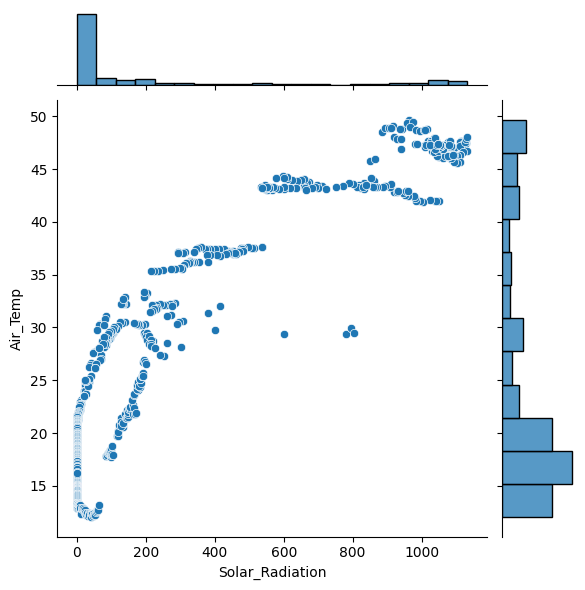

In [6]:
sns.jointplot(x='Solar_Radiation', y='Air_Temp', data=data)

g:\Miniconda\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


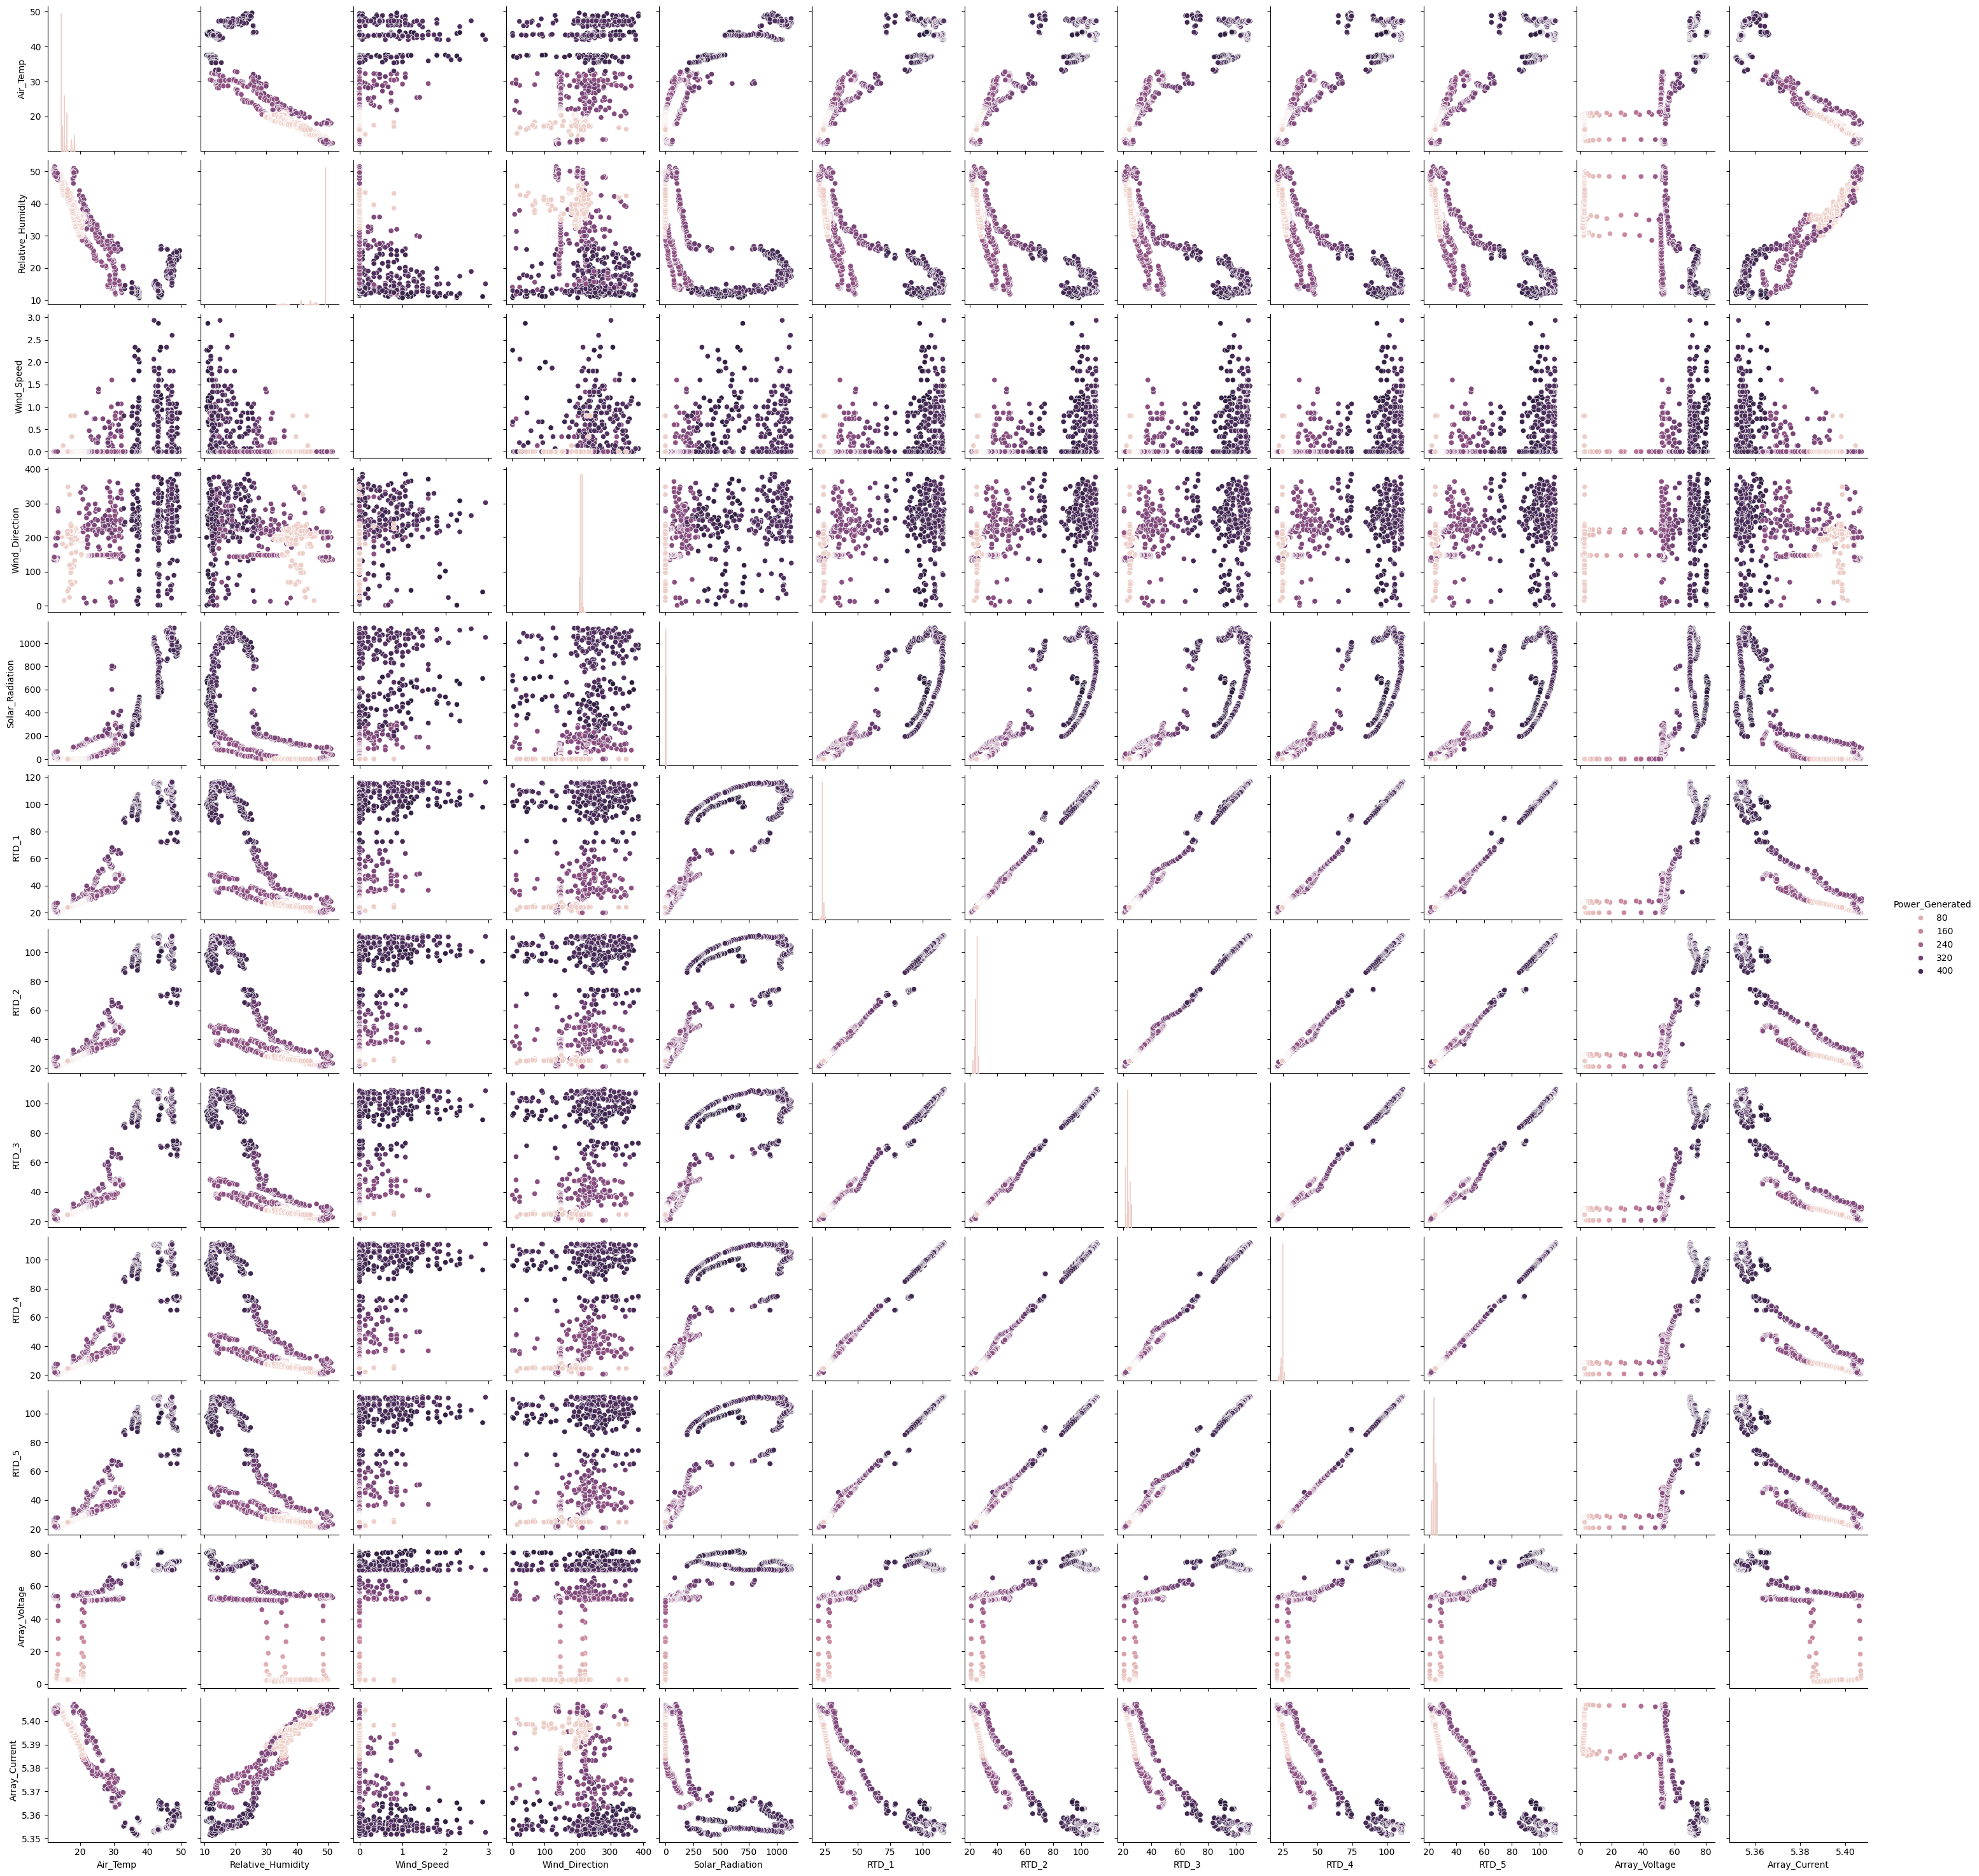

In [7]:
sns.pairplot(data, hue='Power_Generated')

In [8]:
# Removing the two columns which is not in need
waste1 = data.pop("Timestamp")
waste1

0       27-04-2022 15:32
1       27-04-2022 15:34
2       27-04-2022 15:36
3       27-04-2022 15:38
4       27-04-2022 15:40
              ...       
1004    29-04-2022 01:00
1005    29-04-2022 01:02
1006    29-04-2022 01:04
1007    29-04-2022 01:06
1008    29-04-2022 01:08
Name: Timestamp, Length: 1009, dtype: object

In [10]:
waste2 = data.pop("Wind_Direction")

In [11]:
data.head()

Air_Temp  Relative_Humidity  Wind_Speed  Solar_Radiation       RTD_1  \
0  43.349172          12.790256    0.533333        707.53384   98.289640   
1  43.433980          11.468986    1.866667        710.46328   98.377480   
2  43.286580          11.047298    2.866667        695.51016   97.868064   
3  43.523020          12.058292    0.000000        696.24472  101.470960   
4  43.728656          10.722330    2.266667        674.05752  101.664240   

       RTD_2      RTD_3      RTD_4      RTD_5  Array_Voltage  Array_Current  \
0  94.283552  89.002824  93.334288  94.142984      80.178232       5.364869   
1  94.177872  89.334664  93.633208  94.107592      80.266728       5.366041   
2  93.703480  88.844592  92.982568  93.650656      80.187416       5.365501   
3  97.112320  91.963472  96.146384  97.147776      80.727760       5.364512   
4  97.253520  91.980872  96.110968  97.341296      80.500312       5.365144   

   Power_Generated  
0        430.14572  
1        430.71452  
2        430.24568  
3        433.06504  
4        431.89576

### Standardizing the data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numericals = ["Air_Temp", "Relative_Humidity", "Wind_Speed", "Solar_Radiation", "RTD_1", "RTD_2", "RTD_3", "RTD_4", "RTD_5", "Array_Voltage", "Array_Current", "Power_Generated"]
data[numericals] = scaler.fit_transform(data[numericals])

data.head()

Air_Temp  Relative_Humidity  Wind_Speed  Solar_Radiation     RTD_1  \
0  1.574564          -1.543618    0.814157         1.352771  1.505487   
1  1.581984          -1.650873    3.883984         1.360968  1.508074   
2  1.569087          -1.685103    6.186353         1.319129  1.493074   
3  1.589775          -1.603036   -0.413772         1.321185  1.599161   
4  1.607768          -1.711483    4.804932         1.259106  1.604852   

      RTD_2     RTD_3     RTD_4     RTD_5  Array_Voltage  Array_Current  \
0  1.497464  1.411373  1.461600  1.471676       1.486584      -1.019787   
1  1.494121  1.422203  1.470963  1.470572       1.489439      -0.957215   
2  1.479114  1.406209  1.450584  1.456315       1.486880      -0.986045   
3  1.586953  1.507995  1.549679  1.565429       1.504315      -1.038847   
4  1.591419  1.508563  1.548570  1.571468       1.496976      -1.005105   

   Power_Generated  
0         1.485977  
1         1.489400  
2         1.486579  
3         1.503541  
4         1.496506

In [13]:
# split the x and y
Y = data.pop("Power_Generated")
X = data

### split the data into train and test

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
len(x_train), len(x_test)

(807, 202)